**Edited by Gagan - Modified Version of Friend's Notebook**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
train_path= '/kaggle/input/retinal-oct-c8/RetinalOCT_Dataset/RetinalOCT_Dataset/train'
test_path='/kaggle/input/retinal-oct-c8/RetinalOCT_Dataset/RetinalOCT_Dataset/val'

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'categorical')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'categorical')

Found 18400 images belonging to 8 classes.
Found 2800 images belonging to 8 classes.


In [5]:
base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(8, activation='sigmoid'))
model.summary()

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ ?                      │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise (GaussianNoise)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gaussian_noise_1                │ ?                      │   0 (unbuilt) │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,783,535 (41.14 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 10,783,535 (41.14 MB)

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [7]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    steps_per_epoch= 80
    )

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731670626.164310     155 service.cc:145] XLA service 0x5b83725d1590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731670626.164365     155 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 3/50 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - AUC: 0.5104 - Precision: 0.1303 - Recall: 0.5694 - accuracy: 0.0694 - loss: 2.6702        

I0000 00:00:1731670682.742090     155 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - AUC: 0.6252 - Precision: 0.1691 - Recall: 0.6515 - accuracy: 0.1925 - loss: 2.5956 - val_AUC: 0.8289 - val_Precision: 0.2297 - val_Recall: 0.8461 - val_accuracy: 0.5361 - val_loss: 1.3928
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 864ms/step - AUC: 0.8042 - Precision: 0.2131 - Recall: 0.8606 - accuracy: 0.4323 - loss: 1.7841 - val_AUC: 0.8948 - val_Precision: 0.2449 - val_Recall: 0.9536 - val_accuracy: 0.5646 - val_loss: 1.1358
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 43s 879ms/step - AUC: 0.8288 - Precision: 0.2218 - Recall: 0.8482 - accuracy: 0.4984 - loss: 1.5517 - val_AUC: 0.9076 - val_Precision: 0.2679 - val_Recall: 0.9496 - val_accuracy: 0.6271 - val_loss: 1.0519
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 42s 865ms/step - AUC: 0.8860 - Precision: 0.2463 - Recall: 0.9387 - accuracy: 0.5834 - loss: 1.2066 - val_AUC: 0.9019 - val_Precision: 0.2596 - val_Recall: 0.9421 - val_accuracy: 0.6246 - val_loss: 1.1238
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s

In [8]:
model.evaluate(train_generator)

4600/4600 ━━━━━━━━━━━━━━━━━━━━ 381s 83ms/step - AUC: 0.9484 - Precision: 0.2550 - Recall: 0.9895 - accuracy: 0.7547 - loss: 0.6954


[0.7021880149841309,
 0.7522282600402832,
 0.2552427351474762,
 0.9889130592346191,
 0.9476731419563293]

In [9]:
model.evaluate(validation_generator)

700/700 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - AUC: 0.9511 - Precision: 0.2551 - Recall: 0.9914 - accuracy: 0.7677 - loss: 0.6589


[0.6909972429275513,
 0.7574999928474426,
 0.25501748919487,
 0.9892857074737549,
 0.9486106038093567]

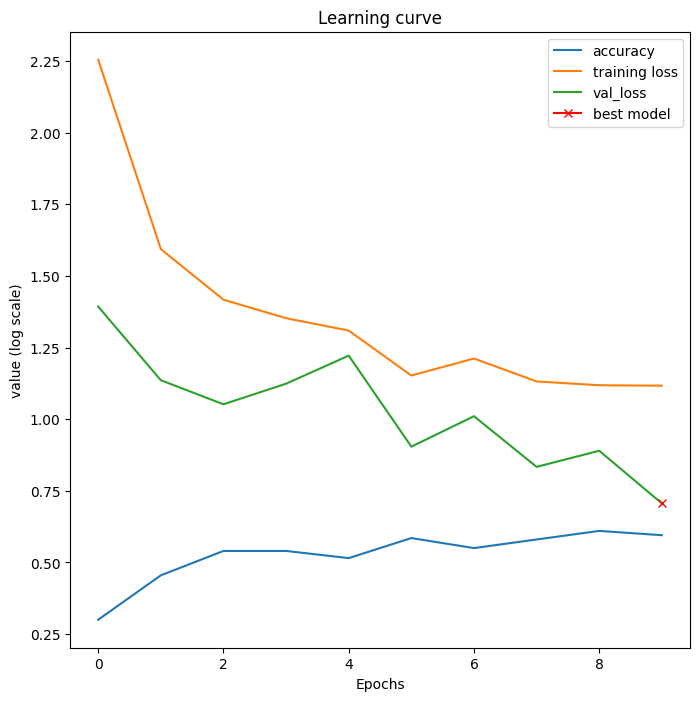

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

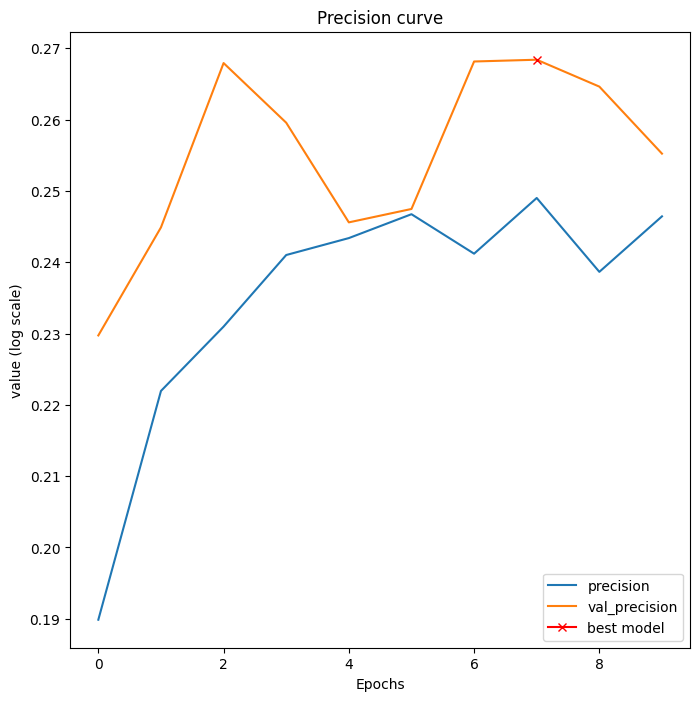

In [12]:
plt.figure(figsize=(8, 8))
plt.title("Precision curve")
plt.plot(history.history["Precision"], label="precision")
plt.plot(history.history["val_Precision"], label="val_precision")
plt.plot( np.argmax(history.history["val_Precision"]), np.max(history.history["val_Precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

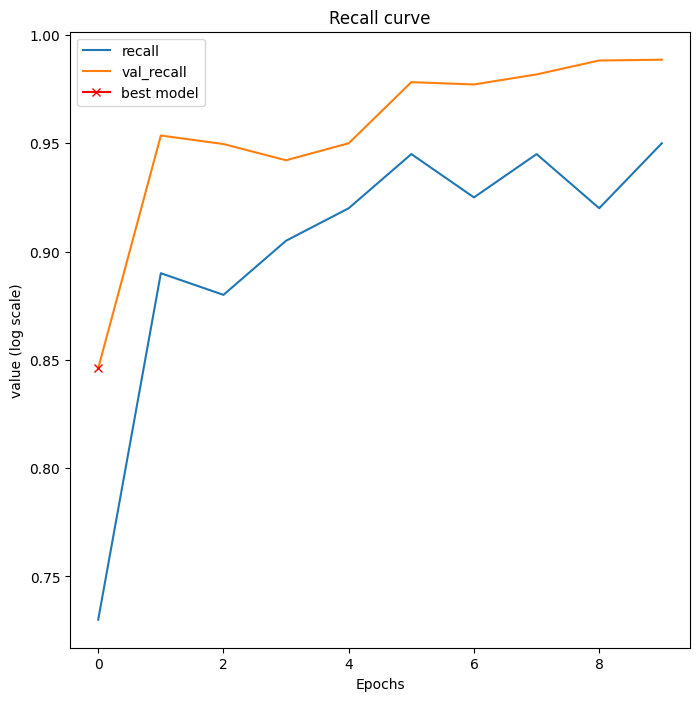

In [13]:
plt.figure(figsize=(8, 8))
plt.title("Recall curve")
plt.plot(history.history["Recall"], label="recall")
plt.plot(history.history["val_Recall"], label="val_recall")
plt.plot( np.argmin(history.history["val_Recall"]), np.min(history.history["val_Recall"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

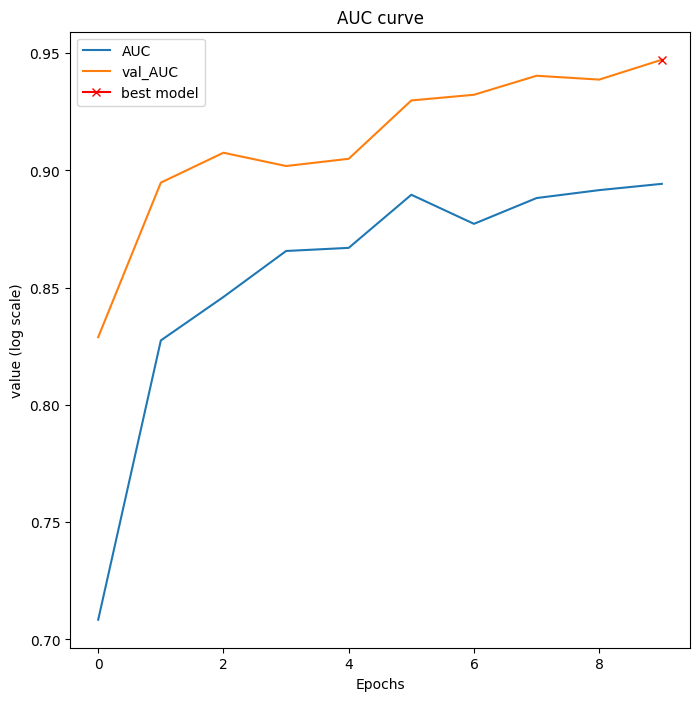

In [14]:
plt.figure(figsize=(8, 8))
plt.title("AUC curve")
plt.plot(history.history["AUC"], label="AUC")
plt.plot(history.history["val_AUC"], label="val_AUC")
plt.plot( np.argmax(history.history["val_AUC"]), np.max(history.history["val_AUC"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.02767831 0.99678385 0.00908039 0.9563958  0.5015375  0.91221523
  0.0222074  0.43528387]]
THE UPLOADED OCT IMAGE IS: CNV


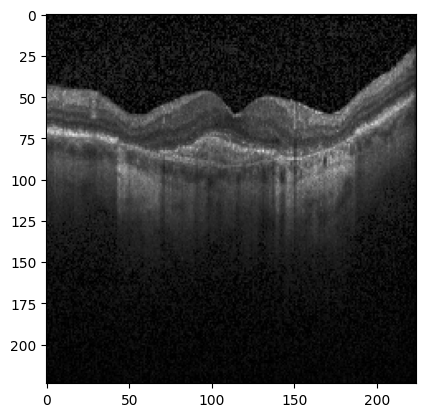

In [16]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/kaggle/input/retinal-oct-c8/RetinalOCT_Dataset/RetinalOCT_Dataset/test/CNV/cnv_test_1001.jpg',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,axis=1)
if a==0:
      op="AMD"   
elif a==1:
    op='CNV'
elif a==2:
    op='CSR'
elif a==3:
    op='DME'
elif a==4:
    op='DR'
elif a==5:
    op='DRUSEN'
elif a==6:
    op='MH'
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED OCT IMAGE IS: "+str(op))